# Bird Type Classification Using the Bird Bones

# List of Contents
## 1 - Exploratory Data Analysis & Pre-processing
## 2 - Training the models
## 3 - Evaluating and selecting one model

the first step is to call all the libraries we require to execute this project

In [1]:
# import necessary libraries
import pandas as pd # pandas is a library for data manipulation and analysis
import numpy as np # numpy is a library for numerical operations
import matplotlib.pyplot as plt # matplotlib are libraries for data visualization
import seaborn as sns # seaborn are libraries for data visualization
from sklearn.model_selection import train_test_split # import functions for splitting data into training and testing sets
from sklearn.model_selection import GridSearchCV # import functions and for performing grid search
from sklearn.preprocessing import QuantileTransformer # import function for quantile transformation
from sklearn.tree import DecisionTreeClassifier # DecisionTreeClassifier is a class for building a decision tree model
from sklearn.ensemble import RandomForestClassifier # RandomForestClassifier is a class for building a random forest model
from sklearn.preprocessing import StandardScaler # library for standardization
from sklearn.neighbors import KNeighborsClassifier # KNeighborsClassifier is a class for building a k-nearest neighbors model
from imblearn.over_sampling import SMOTE # SMOTE stands for Synthetic Minority Oversampling Technique and is a method for oversampling minority classes in imbalanced datasets
import sklearn.metrics as metrics # import the sklearn library as "metrics" for shorter reference in the code
from sklearn import preprocessing # import preprocessing functions from sklearn
import warnings # suppress warnings from being printed
%matplotlib inline

warnings.filterwarnings('ignore') # suppress warnings from being printed

## 1- Exploratory Data Analysis and Pre-processing

The first step of training any model is to initialise by doing the Exploratory Data Analysis(EDA) which consists of multiple steps to visualise the data and enable us to manipulate data to perform training on the pre-processed data to create a model. EDA and pre-processing might be a connected processes as they happen simoultaneously as we visualise the data which is a part of EDA and then we manipulate the data as we visualize the data for a better performance of the model. 

### a- loading the data is the first step of EDA

In [2]:
data = pd.read_csv('./bird.csv') # lodaing the file from the directory

In [3]:
data.shape

(420, 12)

In [4]:
data.head() # reading the data columns and rows to know the dimensions of the data

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW


In [5]:
data.describe().transpose() # this command leads to see the description of data for a better understanding of the data

,count,mean,std,min,25%,50%,75%,max
id,420.0,209.500000,121.387808,0.00,104.7500,209.500,314.250,419.00
huml,419.0,64.650501,53.834549,9.85,25.1700,44.180,90.310,420.00
humw,419.0,4.370573,2.854617,1.14,2.1900,3.500,5.810,17.84
ulnal,417.0,69.115372,58.784775,14.09,28.0500,43.710,97.520,422.00
ulnaw,418.0,3.597249,2.186747,1.00,1.8700,2.945,4.770,12.00
feml,418.0,36.872416,19.979082,11.83,21.2975,31.130,47.120,117.07
femw,419.0,3.220883,2.023581,0.93,1.7150,2.520,4.135,11.64
tibl,418.0,64.662823,37.838145,5.50,36.4175,52.120,82.870,240.00
tibw,419.0,3.182339,2.080827,0.87,1.5650,2.490,4.255,11.03
tarl,419.0,39.229976,23.184313,7.77,23.0350,31.740,50.250,175.00


### b - Data Cleaning in this step we are going to remove the missing values

In [6]:
data.info() # getting info of data, there are missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      420 non-null    int64  
 1   huml    419 non-null    float64
 2   humw    419 non-null    float64
 3   ulnal   417 non-null    float64
 4   ulnaw   418 non-null    float64
 5   feml    418 non-null    float64
 6   femw    419 non-null    float64
 7   tibl    418 non-null    float64
 8   tibw    419 non-null    float64
 9   tarl    419 non-null    float64
 10  tarw    419 non-null    float64
 11  type    420 non-null    object 
dtypes: float64(10), int64(1), object(1)
memory usage: 39.5+ KB


In [7]:
data.info() # getting info of data, there are missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      420 non-null    int64  
 1   huml    419 non-null    float64
 2   humw    419 non-null    float64
 3   ulnal   417 non-null    float64
 4   ulnaw   418 non-null    float64
 5   feml    418 non-null    float64
 6   femw    419 non-null    float64
 7   tibl    418 non-null    float64
 8   tibw    419 non-null    float64
 9   tarl    419 non-null    float64
 10  tarw    419 non-null    float64
 11  type    420 non-null    object 
dtypes: float64(10), int64(1), object(1)
memory usage: 39.5+ KB


In [8]:
data['type'].value_counts() # checking which eco group has most birds

SO    128
SW    116
W      65
R      50
P      38
T      23
Name: type, dtype: int64

<AxesSubplot:>

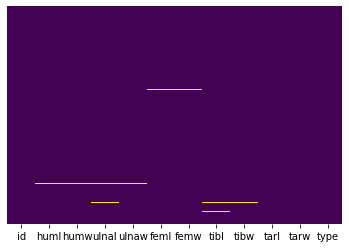

In [9]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
data[(data.isna().cumsum(axis=1).iloc[:,-1])>=2] #locating missing values in tabular form

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
160,160,76.43,4.11,86.79,3.84,NaN,NaN,67.13,2.48,41.65,2.10,W
204,204,63.76,4.74,NaN,NaN,57.33,4.88,75.67,4.33,60.19,3.82,R
207,207,98.08,7.77,113.04,5.76,82.04,7.17,107.47,6.65,NaN,NaN,R
342,342,NaN,NaN,NaN,NaN,32.54,2.65,55.06,2.81,38.94,2.25,SO
378,378,20.10,1.86,NaN,1.52,17.21,1.22,NaN,NaN,18.46,0.91,SO


In [11]:
#drop all NaNs, to mislead the model with false value 
data.dropna(how='any', inplace=True)
data

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW
...,...,...,...,...,...,...,...,...,...,...,...,...
415,415,17.96,1.63,19.25,1.33,18.36,1.54,31.25,1.33,21.99,1.15,SO
416,416,19.21,1.64,20.76,1.49,19.24,1.45,33.21,1.28,23.60,1.15,SO
417,417,18.79,1.63,19.83,1.53,20.96,1.43,34.45,1.41,22.86,1.21,SO
418,418,20.38,1.78,22.53,1.50,21.35,1.48,36.09,1.53,25.98,1.24,SO


In [12]:
data.isna().sum() # check missing values again to see if the nan values have been dropped

id       0
huml     0
humw     0
ulnal    0
ulnaw    0
feml     0
femw     0
tibl     0
tibw     0
tarl     0
tarw     0
type     0
dtype: int64

In [13]:
data.info() # check again the data info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 0 to 419
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      413 non-null    int64  
 1   huml    413 non-null    float64
 2   humw    413 non-null    float64
 3   ulnal   413 non-null    float64
 4   ulnaw   413 non-null    float64
 5   feml    413 non-null    float64
 6   femw    413 non-null    float64
 7   tibl    413 non-null    float64
 8   tibw    413 non-null    float64
 9   tarl    413 non-null    float64
 10  tarw    413 non-null    float64
 11  type    413 non-null    object 
dtypes: float64(10), int64(1), object(1)
memory usage: 41.9+ KB


data.corr()['huml'].sort_values() # id col is -ly cor, so drop

### c - Feature Engineering
 
now we'll check the correlation of the features and we'll remove the features which are negatively relatted or one from the highly related feature.

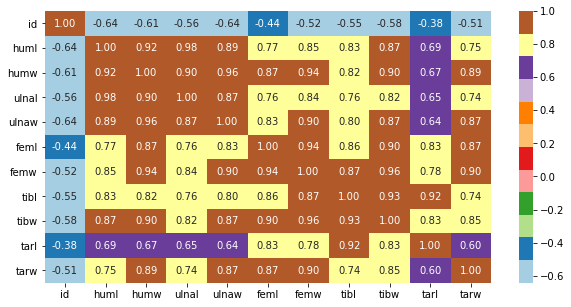

In [14]:
plt.figure(figsize=(10,5)) # this is important, to drop overlaping features with high correlation
sns.heatmap(data.iloc[:,:-1].corr(), annot=True, fmt='.2f',cmap="Paired"); # this command generates a heat map of the correlation enabling us to perform operations on the dataset

<AxesSubplot:>

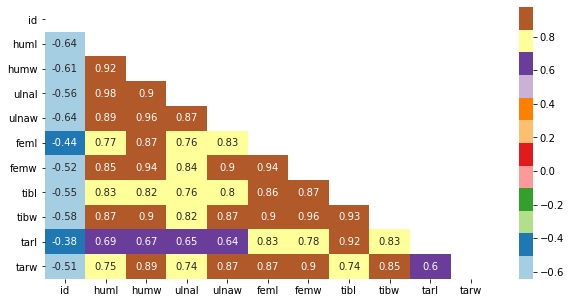

In [15]:
# create a figure and an axis object using plt.subplots and set the size of the figure to (10, 5)
fig, ax = plt.subplots(figsize=(10,5))

# create a masking array called mask using the triu function from numpy
mask = np.triu(data.corr())

# create a heatmap visualization of the correlations between columns in the data DataFrame
# annotate the correlations on the plot and use the mask and cmap parameters to apply the mask and set the colormap to "Paired"
sns.heatmap(data.corr(), annot=True, mask=mask,cmap="Paired", ax=ax)

as we can see the id column is negatively related hence we'll remove this column

In [16]:
data.drop(columns='id', inplace=True) # dropping id column as it is negatively correlated 
data.info() #checking the dataframe to ensure dropping

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 0 to 419
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   huml    413 non-null    float64
 1   humw    413 non-null    float64
 2   ulnal   413 non-null    float64
 3   ulnaw   413 non-null    float64
 4   feml    413 non-null    float64
 5   femw    413 non-null    float64
 6   tibl    413 non-null    float64
 7   tibw    413 non-null    float64
 8   tarl    413 non-null    float64
 9   tarw    413 non-null    float64
 10  type    413 non-null    object 
dtypes: float64(10), object(1)
memory usage: 38.7+ KB


for further processing we'll remove one of the features with high correlation as Ulna length and Humerus length, Ulna width and Humerus width, tibea width and femur width all of these features are all very highly related as their coefficient value is more than 0.95

In [17]:
data.drop(columns='huml', inplace=True) # dropping huml column to decrease the highly correlated features 
data.info() # checking dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 0 to 419
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   humw    413 non-null    float64
 1   ulnal   413 non-null    float64
 2   ulnaw   413 non-null    float64
 3   feml    413 non-null    float64
 4   femw    413 non-null    float64
 5   tibl    413 non-null    float64
 6   tibw    413 non-null    float64
 7   tarl    413 non-null    float64
 8   tarw    413 non-null    float64
 9   type    413 non-null    object 
dtypes: float64(9), object(1)
memory usage: 35.5+ KB


In [18]:
data.drop(columns='humw', inplace=True) # dropping humw column 
data.info() # checking dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 0 to 419
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ulnal   413 non-null    float64
 1   ulnaw   413 non-null    float64
 2   feml    413 non-null    float64
 3   femw    413 non-null    float64
 4   tibl    413 non-null    float64
 5   tibw    413 non-null    float64
 6   tarl    413 non-null    float64
 7   tarw    413 non-null    float64
 8   type    413 non-null    object 
dtypes: float64(8), object(1)
memory usage: 32.3+ KB


In [19]:
data.drop(columns='tibw', inplace=True) # dropping tibw column 
data.info() # checking dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 0 to 419
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ulnal   413 non-null    float64
 1   ulnaw   413 non-null    float64
 2   feml    413 non-null    float64
 3   femw    413 non-null    float64
 4   tibl    413 non-null    float64
 5   tarl    413 non-null    float64
 6   tarw    413 non-null    float64
 7   type    413 non-null    object 
dtypes: float64(7), object(1)
memory usage: 29.0+ KB


### d- Removing Outliers from data 

For data cleaning firstly we removed all the missing values and now we are progressing with removing the outliers in the data. To remove the data outliers I am going to use quantile transform and remove the outliers from each column.

In [20]:
# define a function named "Janitor" that takes in two arguments: a dataset (in the form of a Pandas dataframe) and a column name the purpose of this function is to remove outliers from a specific column of the dataset

def Janitor(data, col_name):               #the purpose of janitor is to remove the outliers in one column of the dataset
    q1 = data[col_name].quantile(0.25) # calculate the first quartile (25th percentile) of the values in the specified column
    q3 = data[col_name].quantile(0.75) # calculate the third quartile (75th percentile) of the values in the specified column
    iqr = q3-q1 # calculate the interquartile range (IQR) by subtracting the first quartile from the third quartile
    fence_low  = q1-1.5*iqr # calculate the lower fence by subtracting 1.5 times the IQR from the first quartile
    fence_high = q3+1.5*iqr # calculate the upper fence by adding 1.5 times the IQR to the third quartile
    d_cleaned = data.loc[(data[col_name] > fence_low) & (data[col_name] < fence_high)] # create a new dataframe that only includes rows where the values in the specified column are greater than the lower fence and less than the upper fence
    return d_cleaned # return the cleaned dataframe

for each of the column same process is going to repeat as the first box plot will display the data before processing and the second plot will illustrate if the outliers have been removed or not.

#### Visualising the outliers in dataset in respective features

<AxesSubplot:xlabel='tarw'>

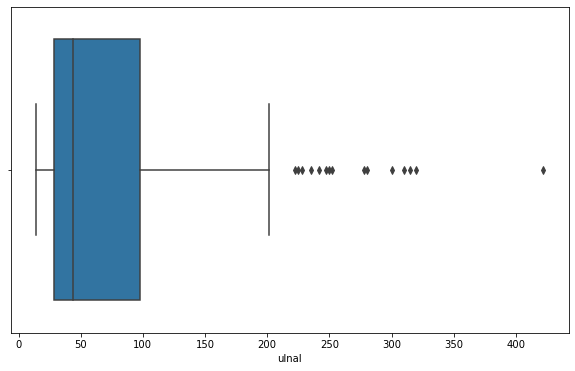

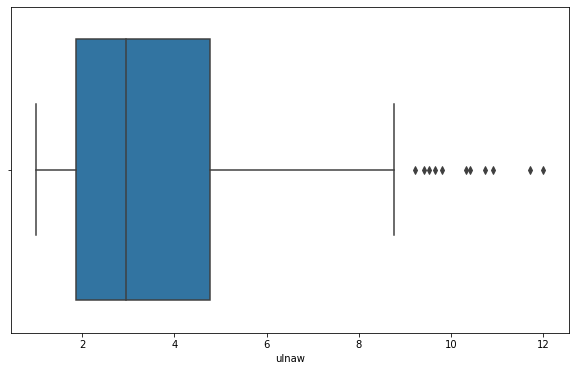

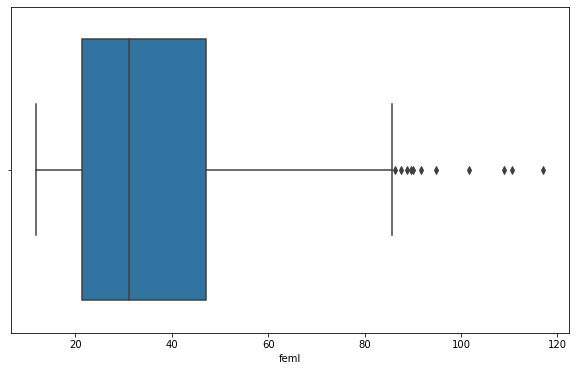

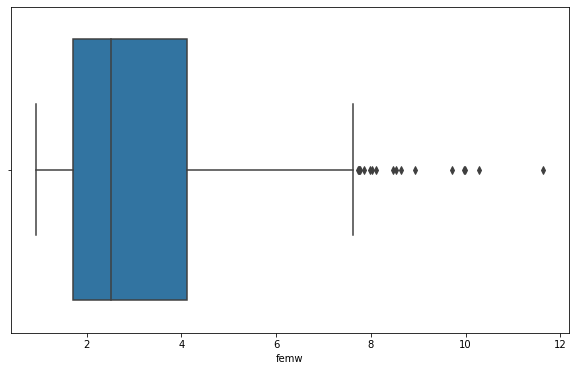

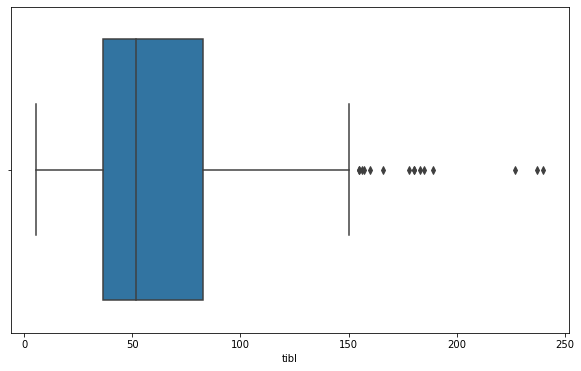

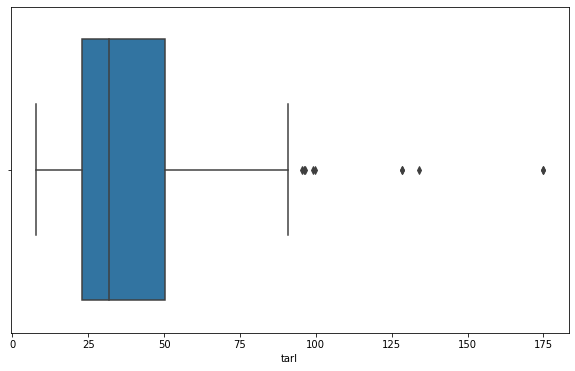

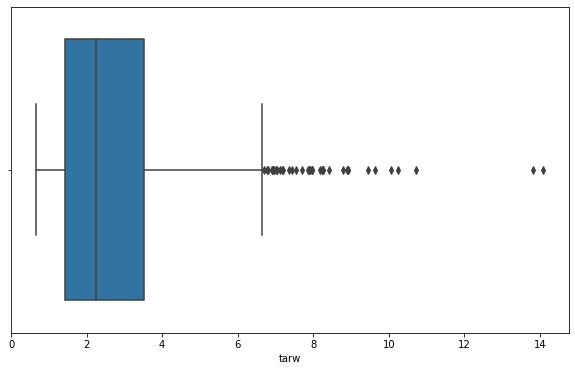

In [21]:
plt.figure(figsize=(10, 6)) # create a new figure with a specified size and set it as the current figure
sns.boxplot(data['ulnal']) # create a box plot using seaborn, using the values in the "ulnal" column of the "data" dataframe as the input
plt.figure(figsize=(10, 6))  # create a new figure with a specified size and set it as the current figure
sns.boxplot(data['ulnaw']) # create a box plot using seaborn, using the values in the "ulnaw" column of the "data" dataframe as the input
plt.figure(figsize=(10, 6)) # create a new figure with a specified size and set it as the current figure
sns.boxplot(data['feml']) # create a box plot using seaborn, using the values in the "feml" column of the "data" dataframe as the input
plt.figure(figsize=(10, 6)) # create a new figure with a specified size and set it as the current figure
sns.boxplot(data['femw']) # create a box plot using seaborn, using the values in the "femw" column of the "data" dataframe as the input
plt.figure(figsize=(10, 6)) # create a new figure with a specified size and set it as the current figure
sns.boxplot(data['tibl']) # create a box plot using seaborn, using the values in the "tibl" column of the "data" dataframe as the input
plt.figure(figsize=(10, 6)) # create a new figure with a specified size and set it as the current figure
sns.boxplot(data['tarl']) # create a box plot using seaborn, using the values in the "tarl" column of the "data" dataframe as the input
plt.figure(figsize=(10, 6)) # create a new figure with a specified size and set it as the current figure
sns.boxplot(data['tarw']) # create a box plot using seaborn, using the values in the "tarw" column of the "data" dataframe as the input

#### Removing the outliers using Quantile transform

In [22]:
data = Janitor(data, 'ulnal') # update the "data" dataframe by reassigning it to the result of calling the "Janitor" function on the dataframe and the "ulnal" column
# this will remove any outliers from the "ulnal" column of the dataframe and return the cleaned dataframe
data = Janitor(data, 'ulnaw') # update the "data" dataframe by reassigning it to the result of calling the "Janitor" function on the dataframe and the "ulnal" column
# this will remove any outliers from the "ulnaw" column of the dataframe and return the cleaned dataframe
data = Janitor(data, 'feml') # update the "data" dataframe by reassigning it to the result of calling the "Janitor" function on the dataframe and the "ulnal" column
# this will remove any outliers from the "feml" column of the dataframe and return the cleaned dataframe
data = Janitor(data, 'femw') # update the "data" dataframe by reassigning it to the result of calling the "Janitor" function on the dataframe and the "ulnal" column
# this will remove any outliers from the "femw" column of the dataframe and return the cleaned dataframe
data = Janitor(data, 'tibl') # update the "data" dataframe by reassigning it to the result of calling the "Janitor" function on the dataframe and the "ulnal" column
# this will remove any outliers from the "tibl" column of the dataframe and return the cleaned dataframe
data = Janitor(data, 'tarl') # update the "data" dataframe by reassigning it to the result of calling the "Janitor" function on the dataframe and the "ulnal" column
# this will remove any outliers from the "tarl" column of the dataframe and return the cleaned dataframe
data = Janitor(data, 'tarw') # update the "data" dataframe by reassigning it to the result of calling the "Janitor" function on the dataframe and the "ulnal" column
# this will remove any outliers from the "tarw" column of the dataframe and return the cleaned dataframe

#### Visual the data after removal of Outliers

<AxesSubplot:xlabel='tarw'>

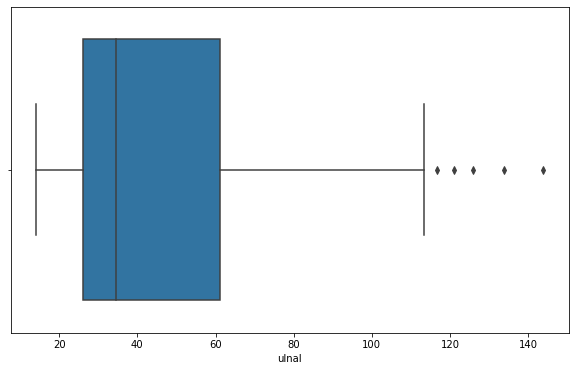

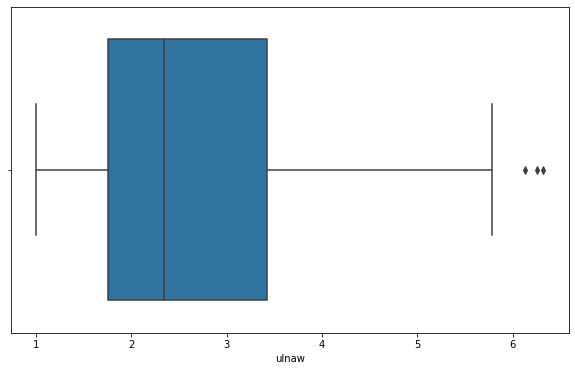

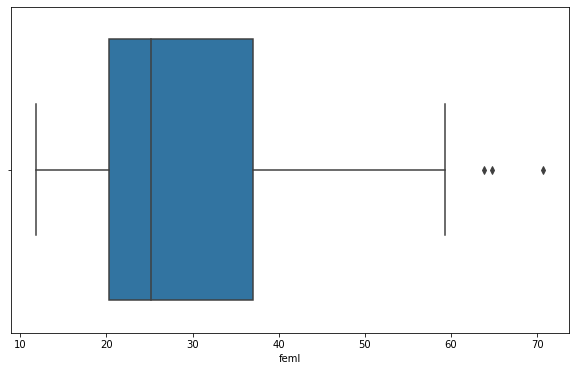

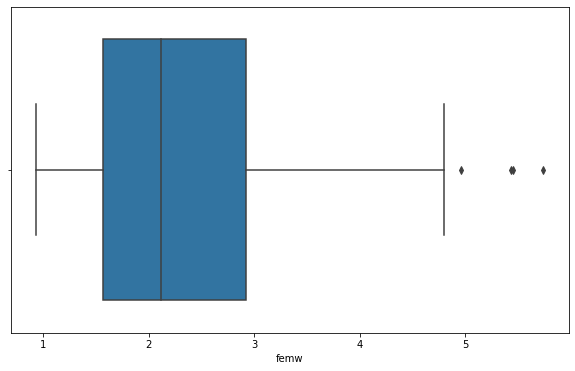

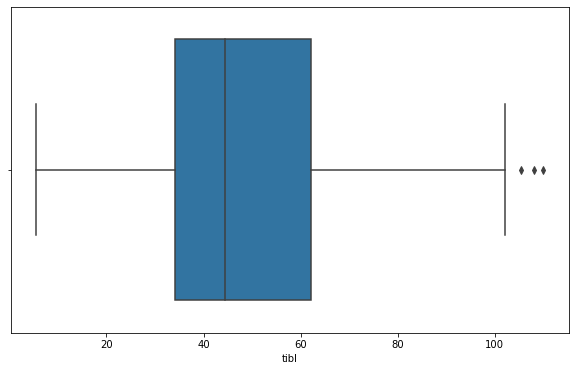

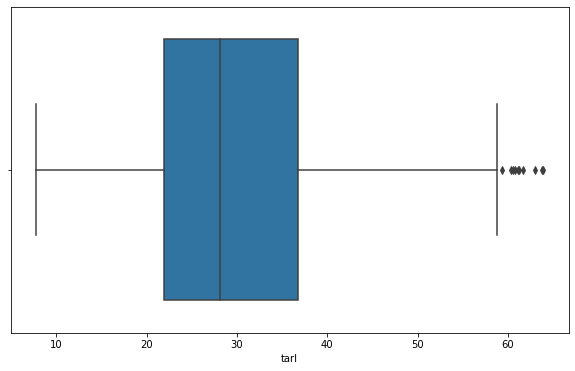

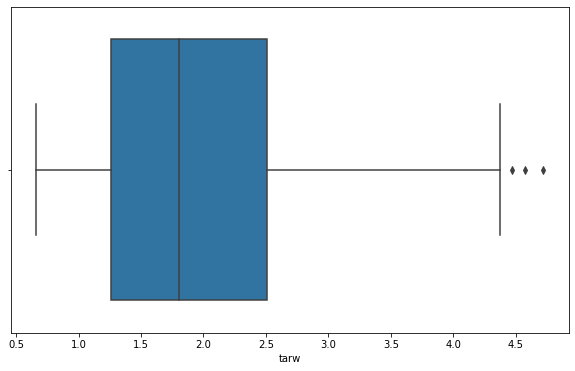

In [23]:
plt.figure(figsize=(10, 6)) # create a new figure with a specified size and set it as the current figure
sns.boxplot(data['ulnal']) # create a box plot using seaborn, using the values in the "ulnal" column of the "data" dataframe as the input
plt.figure(figsize=(10, 6))  # create a new figure with a specified size and set it as the current figure
sns.boxplot(data['ulnaw']) # create a box plot using seaborn, using the values in the "ulnaw" column of the "data" dataframe as the input
plt.figure(figsize=(10, 6)) # create a new figure with a specified size and set it as the current figure
sns.boxplot(data['feml']) # create a box plot using seaborn, using the values in the "feml" column of the "data" dataframe as the input
plt.figure(figsize=(10, 6)) # create a new figure with a specified size and set it as the current figure
sns.boxplot(data['femw']) # create a box plot using seaborn, using the values in the "femw" column of the "data" dataframe as the input
plt.figure(figsize=(10, 6)) # create a new figure with a specified size and set it as the current figure
sns.boxplot(data['tibl']) # create a box plot using seaborn, using the values in the "tibl" column of the "data" dataframe as the input
plt.figure(figsize=(10, 6)) # create a new figure with a specified size and set it as the current figure
sns.boxplot(data['tarl']) # create a box plot using seaborn, using the values in the "tarl" column of the "data" dataframe as the input
plt.figure(figsize=(10, 6)) # create a new figure with a specified size and set it as the current figure
sns.boxplot(data['tarw']) # create a box plot using seaborn, using the values in the "tarw" column of the "data" dataframe as the input

### e - Check the class balance

<AxesSubplot:xlabel='type', ylabel='count'>

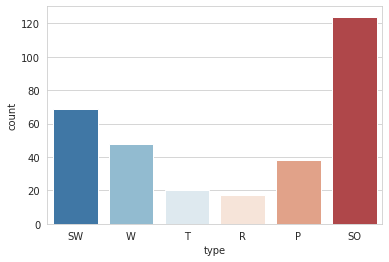

In [24]:
sns.set_style('whitegrid') # set the style of the seaborn plots to a white background with gridlines
sns.countplot(x = data['type'],data = data,palette='RdBu_r') # create a countplot using seaborn, with the values in the "type" column as the x-axis and the data in the "data" dataframe as the input data
# set the color palette of the plot to the "RdBu_r" palette (diverging red-blue)

### f- Distribution of Data

In [25]:
X = data.drop('type',axis=1) # create a new dataframe "X" by dropping the "type" column from the "data" dataframe
# specify that the column should be dropped along the "axis" (1 corresponds to columns, 0 corresponds to rows)

<AxesSubplot:ylabel='Density'>

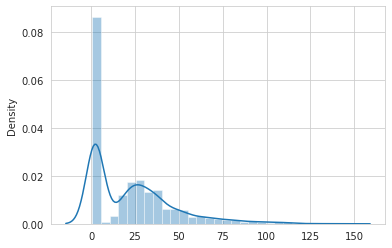

In [26]:
sns.distplot(X) # create a histogram and kernel density plot using seaborn, using the values in the "X" dataframe as the input data

### g -Standardize the data

In [27]:
scaler = StandardScaler() # create an object "scaler" that is an instance of the StandardScaler class
# StandardScaler is a preprocessing method that standardizes features by removing the mean and scaling to unit variance

In [28]:
df_stand=scaler.fit_transform(X)# apply the standardization transformation to the "X" dataframe using the "fit_transform" method of the "scaler" object, and store the result in a new dataframe "df_stand"
# this step standardizes the features in the "X" dataframe by removing the mean and scaling to unit variance
df_stand # display the "df_stand" dataframe

array([[ 0.99188756,  1.86001302,  1.19011785, ..., -2.20740369,
         0.68674915,  2.16714781],
       [ 1.31014951,  2.45778775,  1.6580815 , ...,  1.60348806,
         0.92556209,  2.36463581],
       [ 0.88916217,  2.19678752,  1.30285861, ...,  1.35510686,
         0.65348592,  1.58630073],
       ...,
       [-0.9572801 , -0.96047341, -0.67547337, ..., -0.73088715,
        -0.66424978, -0.88810783],
       [-0.85642244, -0.9857315 , -0.64057741, ..., -0.64724338,
        -0.39814393, -0.85325701],
       [-0.97857227, -1.322506  , -0.97432587, ..., -0.96753781,
        -0.76403947, -1.0739789 ]])

<AxesSubplot:ylabel='Density'>

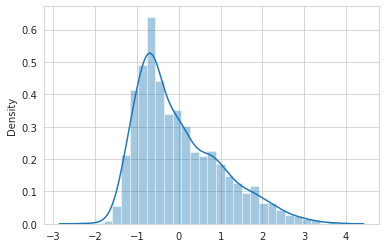

In [29]:
sns.distplot(df_stand) # create a histogram and kernel density plot using seaborn, using the values in the standardized "df_stand" dataframe as the input data

In [30]:
df_feat = pd.DataFrame(df_stand,columns=data.columns[:-1]) # create a new dataframe "df_feat" using the standardized values in the "df_stand" dataframe and the column names of the "data" dataframe, except for the last column
# this creates a dataframe with the same structure as the original "data" dataframe, but with the feature values standardized
df_feat.head() # display the first few rows of the "df_feat" dataframe using the "head" method

,ulnal,ulnaw,feml,femw,tibl,tarl,tarw
0,0.991888,1.860013,1.190118,1.485114,-2.207404,0.686749,2.167148
1,1.310150,2.457788,1.658081,2.121837,1.603488,0.925562,2.364636
2,0.889162,2.196788,1.302859,1.697355,1.355107,0.653486,1.586301
3,0.758421,1.767400,1.031744,1.294098,1.039913,0.437701,1.667619
4,0.247782,0.891786,0.486830,0.445135,0.381983,0.105069,1.342345


### h- Splitting the data into train and test

In [31]:
x_trn, x_tst, y_trn, y_tst = train_test_split(df_stand,data['type'],test_size =0.3 ,random_state=2) # split the standardized feature values in "df_stand" and the target values in "data['type']" into training and testing sets using the "train_test_split" function from sklearn
# specify that the size of the test set should be 30% of the total data using the "test_size" argument and set a random seed for the sampling using the "random_state" argument
# assign the resulting training sets to variables "x_trn" and "y_trn", and the resulting testing sets to variables "x_tst" and "y_tst"

### i - Balancing the classes using SMOTE

As we can see there is a huge class imbalance. then to balance the class we have pre-req that our data is already too less hence we cannot undersample it so we'll perform over sampling to increase the data of low data classes to equal to the data with the highest data class.

In [32]:
X_train, Y_train = SMOTE(random_state=42).fit_resample(x_trn, y_trn)# apply the SMOTE oversampling technique to the training feature values "x_trn" and training target values "y_trn" using the "fit_resample" method of the SMOTE object
# the SMOTE object is initialized with a random seed of 42 to ensure reproducibility
# assign the oversampled feature values to "X_train" and the oversampled target values to "Y_train"
balanced_train = pd.concat([pd.DataFrame(Y_train), pd.DataFrame(X_train)], axis=1) # create a new dataframe "balanced_train" by concatenating the "Y_train" dataframe and the "X_train" dataframe along the specified axis (1 corresponds to columns, 0 corresponds to rows)
# this creates a dataframe with the same structure as the original data, but with the training data balanced using the SMOTE technique

<AxesSubplot:xlabel='type', ylabel='count'>

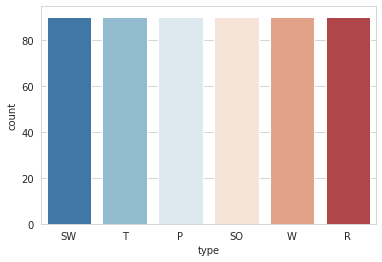

In [33]:
sns.set_style('whitegrid') # set the style of the seaborn plots to a white background with gridlines
sns.countplot(x='type',data=balanced_train,palette='RdBu_r') # create a countplot using seaborn, with the values in the "type" column as the x-axis and the data in the "balanced_train" dataframe as the input data
# set the color palette of the plot to the "RdBu_r" palette (diverging red-blue)

### j- Label encoding

In [34]:
le = preprocessing.LabelEncoder() # create an object "le" that is an instance of the LabelEncoder class from the "preprocessing" module
# LabelEncoder is a preprocessing method that encodes categorical variables as integers

In [35]:
le.fit(balanced_train["type"]) # fit the "le" object to the "type" column of the "balanced_train" dataframe using the "fit" method
# this step prepares the LabelEncoder object to be used on the "type" column

LabelEncoder()

In [36]:
list(le.classes_) # display the list of unique categories in the "type" column of the "balanced_train" dataframe, as encoded by the "le" object
# the "classes_" attribute of the "le" object stores the list of unique categories

['P', 'R', 'SO', 'SW', 'T', 'W']

## 2 - Training multiple models to compare and select the best model

### a - Decision tree classifier

In [37]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],  # create a dictionary "param_grid" that defines the hyperparameter values to be used in a grid search
              'ccp_alpha': [0.1, .01, .001],             # the grid search will tune the hyperparameters of a decision tree model
              'max_depth' : [5, 6, 7, 8, 9],             # the hyperparameters being tuned are:
              'criterion' :['gini', 'entropy']           # - "max_features": the number of features to consider when looking for the best split
             }                                           # - "ccp_alpha": the complexity parameter of the decision tree model, which controls the amount of pruning
                                                         # - "max_depth": the maximum depth of the decision tree
                                                         # - "criterion": the function used to evaluate the quality of a split
                                                         # the values for each hyperparameter are specified as lists of possible values

In [38]:
grid = GridSearchCV(DecisionTreeClassifier(),param_grid,refit=True,verbose=3) # create an object "grid" that is an instance of the GridSearchCV class
# the GridSearchCV class performs an exhaustive search over a specified parameter grid to find the best hyperparameter values for a given model
# the model being used in this case is a Decision Tree Classifier
# the hyperparameter values to be searched are defined in the "param_grid" dictionary
# the "refit" argument specifies that the best estimator should be refitted on the entire training set with the best found parameters
# the "verbose" argument controls the amount of output generated by the grid search

In [39]:
grid.fit(X_train,Y_train) # fit the "grid" object to the oversampled training feature values "X_train" and training target values "Y_train" using the "fit" method
# this step performs the grid search to find the best hyperparameter values for the Decision Tree Classifier model

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto;, score=0.167 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto;, score=0.167 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto;, score=0.167 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto;, score=0.167 total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto;, score=0.167 total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=sqrt;, score=0.167 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=sqrt;, score=0.167 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=sqrt;, score=0.167 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=sqrt

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=3)

In [40]:
grid.best_params_ # display the best hyperparameter values found by the grid search, as stored in the "best_params_" attribute of the "grid" object

{'ccp_alpha': 0.001,
 'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'log2'}

In [41]:
grid.best_estimator_ # display the best estimator found by the grid search, as stored in the "best_estimator_" attribute of the "grid" object
# the best estimator is the Decision Tree Classifier model with the hyperparameter values that performed the best on the training data, as determined by the grid search

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='log2')

In [42]:
dtree = DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=8,max_features='log2') # create an object "dtree" that is an instance of the DecisionTreeClassifier class
# the hyperparameters specified in the constructor are the best values found by the grid search
# these hyperparameters will be used to initialize the decision tree model

In [43]:
dtree.fit(X_train,Y_train) # fit the "dtree" object to the oversampled training feature values "X_train" and training target values "Y_train" using the "fit" method
# this step trains the decision tree model using the specified hyperparameters and the training data

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=8,
                       max_features='log2')

In [44]:
predictions = dtree.predict(x_tst) # make predictions on the testing feature values "x_tst" using the "predict" method of the "dtree" object
# store the predictions in a variable called "predictions"

In [45]:
dtree_Con_matrix =metrics.confusion_matrix(y_tst,predictions) # create a confusion matrix using the "confusion_matrix" function from the "metrics" module, using the testing target values "y_tst" and the model's predictions "predictions" as inputs
# store the confusion matrix in a variable called "dtree_Con_matrix"

### b - Random Forest classifier

In [46]:
param_grid = { 'n_estimators': [1, 500],'max_features': ['auto', 'sqrt', 'log2'],'max_depth' : [4,5,6,7,8],'criterion' :['gini', 'entropy']} 
# create a dictionary "param_grid" that defines the hyperparameter values to be used in a grid search
# the grid search will tune the hyperparameters of a random forest model
# the hyperparameters being tuned are:
# - "n_estimators": the number of decision trees in the forest
# - "max_features": the number of features to consider when looking for the best split
# - "max_depth": the maximum depth of the decision trees in the forest
# - "criterion": the function used to evaluate the quality of a split
# the values for each hyperparameter are specified as lists of possible values

In [47]:
grid = GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=3) # create an object "grid" that is an instance of the GridSearchCV class
# the GridSearchCV class performs an exhaustive search over a specified parameter grid to find the best hyperparameter values for a given model
# the model being used in this case is a Random Forest Classifier
# the hyperparameter values to be searched are defined in the "param_grid" dictionary
# the "refit" argument specifies that the best estimator should be refitted on the entire training set with the best found parameters
# the "verbose" argument controls the amount of output generated by the grid search

In [48]:
grid.fit(X_train,Y_train) # fit the "grid" object to the oversampled training feature values "X_train" and training target values "Y_train" using the "fit" method
# this step performs the grid search to find the best hyperparameter values for the Random Forest Classifier model

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=1;, score=0.472 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=1;, score=0.648 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=1;, score=0.639 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=1;, score=0.611 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=1;, score=0.694 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500;, score=0.759 total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500;, score=0.769 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500;, score=0.778 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=4, max_features=auto,

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 500]},
             verbose=3)

In [49]:
grid.best_params_ # display the best hyperparameter values found by the grid search, as stored in the "best_params_" attribute of the "grid" object

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [50]:
grid.best_estimator_ # display the best estimator found by the grid search, as stored in the "best_estimator_" attribute of the "grid" object
# the best estimator is the Random Forest Classifier model with the hyperparameter values that performed the best on the training data, as determined by the grid search

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt',
                       n_estimators=500)

In [51]:
rfc = RandomForestClassifier(criterion= 'entropy', max_depth= 8, max_features= 'sqrt', n_estimators= 500)# create an object "rfc" that is an instance of the RandomForestClassifier class
# the hyperparameters specified in the constructor are the best values found by the grid search
# these hyperparameters will be used to initialize the random forest model
rfc.fit(X_train, Y_train)# fit the "rfc" object to the oversampled training feature values "X_train" and training target values "Y_train" using the "fit" method
# this step trains the random forest model using the specified hyperparameters and the training data

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt',
                       n_estimators=500)

In [52]:
rfc_pred = rfc.predict(x_tst) # make predictions on the testing feature values "x_tst" using the "predict" method of the "rfc" object
# store the predictions in a variable called "rfc_pred"

In [53]:
rfc_Con_matrix = metrics.confusion_matrix(y_tst,rfc_pred) # create a confusion matrix using the "confusion_matrix" function from the "metrics" module, using the testing target values "y_tst" and the model's predictions "rfc_pred" as inputs
# store the confusion matrix in a variable called "rfc_Con_matrix"

### c - KNN

In [54]:
error_rate = [] # create an empty list called "error_rate" to store the error rates of the K-Nearest Neighbors (KNN) model for different values of K
for i in range(1,40): # for each integer value of "i" in the range 1 to 40:
    knn = KNeighborsClassifier(n_neighbors=i) # - create an object "knn" that is an instance of the KNeighborsClassifier class
    knn.fit(X_train,Y_train) # - set the value of the "n_neighbors" hyperparameter to "i" # - fit the "knn" object to the oversampled training feature values "X_train" and training target values "Y_train" using the "fit" method
    pred_i = knn.predict(x_tst) # - make predictions on the testing feature values "x_tst" using the "predict" method of the "knn" object
    error_rate.append(np.mean(pred_i != y_tst)) # - store the predictions in a variable called "pred_i"
# - calculate the mean error rate of the predictions by taking the mean of the number of elements in "pred_i" that are not equal to the corresponding elements in "y_tst"
# - append the error rate to the "error_rate" list
# the resulting list "error_rate" will contain the error rate for each value of K tested

Text(0, 0.5, 'Error Rate')

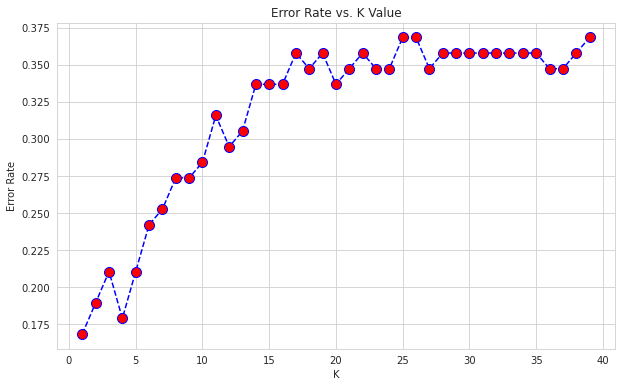

In [55]:
plt.figure(figsize=(10,6)) # create a figure object with a specified width and height
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o', # create a line plot using the "error_rate" list as the y-values and the range of integers from 1 to 40 as the x-values
markerfacecolor='red', markersize=10)# set the color, linestyle, and marker style of the plotted line
plt.title('Error Rate vs. K Value')# add a title, x-axis label, and y-axis label to the plot
plt.xlabel('K') # set the x axis label to K
plt.ylabel('Error Rate')# show the plot

In [56]:
KNN = KNeighborsClassifier(n_neighbors=17) # create an object "KNN" that is an instance of the KNeighborsClassifier class
# set the value of the "n_neighbors" hyperparameter to 17
# this value was chosen based on the plot of error rate vs. K value, which showed that a K value of 17 resulted in a relatively low error rate

In [57]:
KNN.fit(X_train,Y_train) # fit the "KNN" object to the oversampled training feature values "X_train" and training target values "Y_train" using the "fit" method
# this step trains the KNN model using the specified hyperparameter value and the training data

KNeighborsClassifier(n_neighbors=17)

In [58]:
KNN_pred=knn.predict(x_tst) # make predictions on the testing feature values "x_tst" using the "predict" method of the "KNN" object
# store the predictions in a variable called "KNN_pred"

In [59]:
KNN_Con_matrix =metrics.confusion_matrix(y_tst,KNN_pred) # create a confusion matrix using the "confusion_matrix" function from the "metrics" module, using the testing target values "y_tst" and the model's predictions "KNN_pred" as inputs
# store the confusion matrix in a variable called "KNN_Con_matrix"

### 3 - Evaluation of models

#### a - Decision Tree Classifier evaluation 

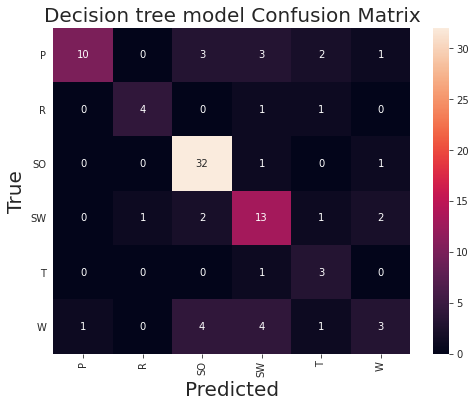

In [60]:
labels = le.classes_ # create a list of class labels called "labels" using the "classes_" attribute of the "le" object (which is a label encoder)
class_names = labels # create a variable "class_names" that is a copy of "labels"

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(8, 6)) # create a figure object with a specified width and height
ax= plt.subplot() # create a subplot object in the figure
sns.heatmap(dtree_Con_matrix, annot=True, ax = ax, fmt = 'g'); # add labels to the cells of the heatmap using the "annotate" argument # create a heatmap of the confusion matrix "dtree_Con_matrix" using the "heatmap" function from the "seaborn" library
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20) # set the x-axis label and y-axis label of the plot using the "set_xlabel" and "set_ylabel" methods, respectively
ax.xaxis.set_label_position('bottom') # set the position of the x-axis label using the "set_label_position" method
plt.xticks(rotation=90) # rotate the x-tick labels 90 degrees using the "xticks" method
ax.xaxis.set_ticklabels(class_names, fontsize = 10) # set the tick labels for the x-axis using the "set_ticklabels" method
ax.xaxis.tick_bottom() # move the x-tick labels to the bottom of the plot using the "tick_bottom" method

ax.set_ylabel('True', fontsize=20) # set the tick labels for the y-axis using the "set_ticklabels" method
ax.yaxis.set_ticklabels(class_names, fontsize = 10) 
plt.yticks(rotation=0) # rotate the y-tick labels 0 degrees using the "yticks" method

plt.title('Decision tree model Confusion Matrix', fontsize=20) # add a title to the plot using the "title" method

plt.savefig('ConMat24.png') # save the plot as a png file using the "savefig" method
plt.show() # show the plot using the "show" method

In [61]:
# extracting the values of False positive, False negative, True positive and true negative from the confusion matrix 
FP_dtree = np.sum(dtree_Con_matrix, axis=0) - np.diag(dtree_Con_matrix) # create variables "FP_dtree", "FN_dtree", "TP_dtree", and "TN_dtree" that store the number of false positives, false negatives, true positives, and true negatives, respectively, in the confusion matrix "dtree_Con_matrix"
FN_dtree = np.sum(dtree_Con_matrix, axis=1) - np.diag(dtree_Con_matrix) # the false positives are calculated by summing the values in each column of the confusion matrix and subtracting the diagonal elements (which are the true positives)
TP_dtree = np.diag(dtree_Con_matrix) # the false negatives are calculated by summing the values in each row of the confusion matrix and subtracting the diagonal elements (which are the true positives)
TN_dtree = np.sum(dtree_Con_matrix) - (FP_dtree + FN_dtree + TP_dtree)# the true positives are equal to the diagonal elements of the confusion matrix
# the true negatives are calculated by summing all the elements in the confusion matrix and subtracting the false positives, false negatives, and true positives
SEN_dtree = TP_dtree/(TP_dtree+FN_dtree) # create a variable "SEN_dtree" that stores the sensitivity of the decision tree model, calculated as the mean of the true positives divided by the sum of the true positives and false negatives for each class
print("Sensitivity Decision Tree Model:", np.mean(SEN_dtree)) # print the sensitivity of the decision tree model
SPF_dtree = TN_dtree/(TN_dtree+FP_dtree) # create a variable "SPF_dtree" that stores the specificity of the decision tree model, calculated as the mean of the true negatives divided by the sum of the true negatives and false positives for each class
print("Specificity of Decision Tree Model :", np.mean(SPF_dtree)) # print the specificity of the decision tree model
AUC_dtree = metrics.roc_auc_score(y_tst, dtree.predict_proba(x_tst), multi_class="ovo",average= "weighted") # create a variable "AUC_dtree" that stores the area under the curve of the decision tree model, calculated using the "roc_auc_score" function from the "metrics" module and the testing target values "y_tst" and the model's predicted probabilities for the testing feature values "x_tst"
print("Area Under the Curve of Decision Tree Model:", AUC_dtree) # print the area under the curve of the decision tree model
Loss_dtree = metrics.log_loss(y_tst, dtree.predict_proba(x_tst), eps=1e-15) # create a variable "Loss_dtree" that stores the log loss of the decision tree model, calculated using the "log_loss" function from the "metrics" module and the testing target values "y_tst" and the model's predicted probabilities for the testing feature values "x_tst"
print("Loss of model :", Loss_dtree) # print the log loss of the decision tree model
print(metrics.classification_report(y_tst, predictions)) # print the classification report for the decision tree model using the "classification_report" function from the "metrics" module and the testing target values "y_tst" and the model

Sensitivity Decision Tree Model: 0.633189780635601
Specificity of Decision Tree Model : 0.9321267794136778
Area Under the Curve of Decision Tree Model: 0.7889919801289361
Loss of model : 10.569091045259094
              precision    recall  f1-score   support

           P       0.91      0.53      0.67        19
           R       0.80      0.67      0.73         6
          SO       0.78      0.94      0.85        34
          SW       0.57      0.68      0.62        19
           T       0.38      0.75      0.50         4
           W       0.43      0.23      0.30        13

    accuracy                           0.68        95
   macro avg       0.64      0.63      0.61        95
weighted avg       0.70      0.68      0.67        95



### b - Random Forest Classifier Evaluation 

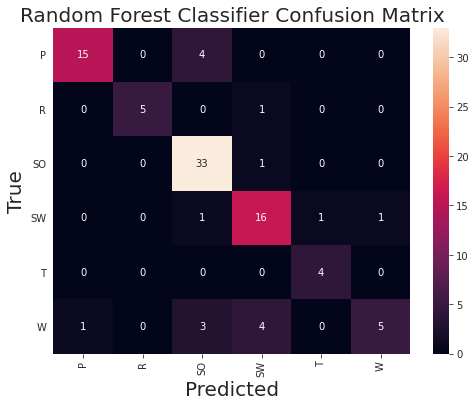

In [62]:
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(8, 6)) # create a figure object with a specified width and height
ax= plt.subplot() # create a subplot object in the figure
sns.heatmap(rfc_Con_matrix, annot=True, ax = ax, fmt = 'g'); # add labels to the cells of the heatmap using the "annotate" argument # create a heatmap of the confusion matrix "rfc_Con_matrix" using the "heatmap" function from the "seaborn" library
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20) # set the x-axis label and y-axis label of the plot using the "set_xlabel" and "set_ylabel" methods, respectively
ax.xaxis.set_label_position('bottom') # set the position of the x-axis label using the "set_label_position" method
plt.xticks(rotation=90) # rotate the x-tick labels 90 degrees using the "xticks" method
ax.xaxis.set_ticklabels(class_names, fontsize = 10) # set the tick labels for the x-axis using the "set_ticklabels" method
ax.xaxis.tick_bottom() # move the x-tick labels to the bottom of the plot using the "tick_bottom" method

ax.set_ylabel('True', fontsize=20) # set the tick labels for the y-axis using the "set_ticklabels" method
ax.yaxis.set_ticklabels(class_names, fontsize = 10) 
plt.yticks(rotation=0) # rotate the y-tick labels 0 degrees using the "yticks" method

plt.title('Random Forest Classifier Confusion Matrix', fontsize=20) # add a title to the plot using the "title" method

plt.savefig('ConMat24.png') # save the plot as a png file using the "savefig" method
plt.show() # show the plot using the "show" method

In [63]:
# Calculate the number of false positives, false negatives, true positives, and true negatives for the random forest classifier model
FP_rfc = np.sum(rfc_Con_matrix, axis=0) - np.diag(rfc_Con_matrix) # false positives
FN_rfc = np.sum(rfc_Con_matrix, axis=1) - np.diag(rfc_Con_matrix) # false negatives
TP_rfc = np.diag(rfc_Con_matrix) # true positives
TN_rfc = np.sum(rfc_Con_matrix) - (FP_rfc + FN_rfc + TP_rfc) # true negatives

# Calculate the sensitivity (true positive rate) of the model
SEN_rfc = TP_rfc/(TP_rfc+FN_rfc)
print("Sensitivity score of Random Forest Classifier :", np.mean(SEN_rfc))

# Calculate the specificity (true negative rate) of the model
SPF_rfc = TN_rfc/(TN_rfc+FP_rfc)
print("Specificity score of Random Forest Classifier :", np.mean(SPF_rfc))# printing the value of specificity

# Calculate the log loss of the model
Loss_rfc = metrics.log_loss(y_tst, rfc.predict_proba(x_tst), eps=1e-15)
print("Loss of Random Forest Classifier:", Loss_rfc)

# Calculate the AUC score of the model
AUC_rfc = metrics.roc_auc_score(y_tst, rfc.predict_proba(x_tst), multi_class="ovo",average= "weighted")
print("Area Under the Curve score of model :", AUC_rfc)

# Generate a classification report for the model
print(metrics.classification_report(y_tst, rfc_pred))


Sensitivity score of Random Forest Classifier : 0.8033526501018762
Specificity score of Random Forest Classifier : 0.9589271771530447
Loss of Random Forest Classifier: 0.6896569703137172
Area Under the Curve score of model : 0.947020949014594
              precision    recall  f1-score   support

           P       0.94      0.79      0.86        19
           R       1.00      0.83      0.91         6
          SO       0.80      0.97      0.88        34
          SW       0.73      0.84      0.78        19
           T       0.80      1.00      0.89         4
           W       0.83      0.38      0.53        13

    accuracy                           0.82        95
   macro avg       0.85      0.80      0.81        95
weighted avg       0.83      0.82      0.81        95



### c - KNearest Neighbor Classifier Evaluation

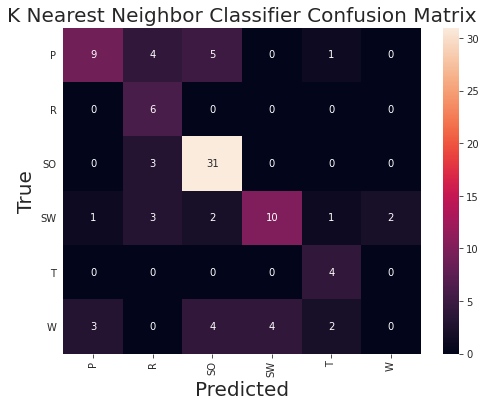

In [64]:
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(8, 6)) # create a figure object with a specified width and height
ax= plt.subplot() # create a subplot object in the figure
sns.heatmap(KNN_Con_matrix, annot=True, ax = ax, fmt = 'g'); # add labels to the cells of the heatmap using the "annotate" argument # create a heatmap of the confusion matrix "KNN_Con_matrix" using the "heatmap" function from the "seaborn" library
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20) # set the x-axis label and y-axis label of the plot using the "set_xlabel" and "set_ylabel" methods, respectively
ax.xaxis.set_label_position('bottom') # set the position of the x-axis label using the "set_label_position" method
plt.xticks(rotation=90) # rotate the x-tick labels 90 degrees using the "xticks" method
ax.xaxis.set_ticklabels(class_names, fontsize = 10) # set the tick labels for the x-axis using the "set_ticklabels" method
ax.xaxis.tick_bottom() # move the x-tick labels to the bottom of the plot using the "tick_bottom" method

ax.set_ylabel('True', fontsize=20) # set the tick labels for the y-axis using the "set_ticklabels" method
ax.yaxis.set_ticklabels(class_names, fontsize = 10) 
plt.yticks(rotation=0) # rotate the y-tick labels 0 degrees using the "yticks" method

plt.title('K Nearest Neighbor Classifier Confusion Matrix', fontsize=20) # add a title to the plot using the "title" method

plt.savefig('ConMat24.png') # save the plot as a png file using the "savefig" method
plt.show() # show the plot using the "show" method

In [65]:
# Calculate the number of false positives, false negatives, true positives, and true negatives for the KNN classifier model
FP_KNN = np.sum(KNN_Con_matrix, axis=0) - np.diag(KNN_Con_matrix) # false positives
FN_KNN = np.sum(KNN_Con_matrix, axis=1) - np.diag(KNN_Con_matrix) # false negatives
TP_KNN = np.diag(KNN_Con_matrix) # true positives
TN_KNN = np.sum(KNN_Con_matrix) - (FP_KNN + FN_KNN + TP_KNN) # true negatives

# Calculate the sensitivity (true positive rate) of the model
SEN_KNN = TP_KNN/(TP_KNN+FN_KNN)
print("Sensitivity score of K-Nearest Neighbour Classifier :", np.mean(SEN_KNN))

# Calculate the specificity (true negative rate) of the model
SPF_KNN = TN_KNN/(TN_KNN+FP_KNN)
print("Specificity score of K-Nearest Neighbour Classifier :", np.mean(SPF_KNN))

# Calculate the log loss of the model
Loss_KNN = metrics.log_loss(y_tst, KNN.predict_proba(x_tst), eps=1e-15)
print("Loss of K-Nearest Neighbour Classifier:", Loss_KNN)

AUC_KNN = metrics.roc_auc_score(y_tst, KNN.predict_proba(x_tst), multi_class="ovo",average= "weighted") # Calculate the AUC score of the KNN model
print("Area Under the Curve score of K-Nearest Neighbour Classifier :", AUC_KNN) # Print the AUC score

print(metrics.classification_report(y_tst, KNN_pred)) # Generate a classification report for the KNN model

Sensitivity score of K-Nearest Neighbour Classifier : 0.6519607843137255
Specificity score of K-Nearest Neighbour Classifier : 0.9222838558054205
Loss of K-Nearest Neighbour Classifier: 3.075213692275503
Area Under the Curve score of K-Nearest Neighbour Classifier : 0.9127324488286686
              precision    recall  f1-score   support

           P       0.69      0.47      0.56        19
           R       0.38      1.00      0.55         6
          SO       0.74      0.91      0.82        34
          SW       0.71      0.53      0.61        19
           T       0.50      1.00      0.67         4
           W       0.00      0.00      0.00        13

    accuracy                           0.63        95
   macro avg       0.50      0.65      0.53        95
weighted avg       0.59      0.63      0.59        95



### d - Selecting and Justifying the final Classifier selected for our problem

Three models trained were selected on the basis of their ability to handle multi-class problems hence we selected Decision Tree, Random Forest and KNearest Neighbors as our trainable model whereas our data required us to balance the classes as there was a huge imbalance and the options for balancing were limited as the data we have is not enough for training the model to classify six classes hence the choice made was to use SMOTE to add synthetic data for our dataset. Furthermore, upon checking the data distribution it was clear that the distribution of the data had a right skew and to eliminate this I had touse either standardization or normalization as I already knew that I had to balance the classes hence the normalization was eleminated from the selection as we cannot balance the normalized data. then the data was nearly in gaussean distibution and ready for training the model. Then, I split the data and then increased the number of samples using SMOTE and had the divided into X_train, Y_train, x_tst, y_tst and completely ready to be trained. After training the model I have compared all the evaluation metrics of the models and the deciding factor of the model was mainly the cross entropy loss also know as log_loss in sklearn metrics because it indicates if the trained model is able to classify the right class properly. whreas we'll still compare other metrics such as senstivity, specificity and area un the curve of a roc curve.

Evaluating the performance of our trained model let's focus on the results of decision tree classifier, KNN and Random Forest Classifier respectively, the senstivity score or the true positive rate of 0.67, 0.65, 0.80 specificty score is 0.94, 0.92, 0.95 AUC is 0.82, 0.91, 0.95 and Loss is 9.2, 3.08, 0.7 the senstivity of the this model indicates that it is only able to detect the right class 67% of the times and specificity indicates that it is able to identify the true negative 94% of the times and for a good model the senstivity should be higher than the specificity the AUC tells us if the model is able to classify any input given to regardless if it is right classification or the wrong classification and the loss tells us if the model is able to make right classification upon analysis of the models train Random Forest Classifier is able to classify the right with the highest amount of senstivity , specificity, AUC and the best loss. 